In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from scipy.interpolate import interp1d

In [3]:
D = 11*25.4/1000 # propellr diameter
rho = 1.22 # air density
omega3000 = 3000 * 2 * np.pi / 60 # 
omega6000 = 6000 * 2 * np.pi / 60 # 
omega9000 = 9000 * 2 * np.pi / 60 # 
Vin = np.linspace(12.8, 16.8, 1000) # input voltage

Static = np.loadtxt("Static.txt", skiprows=1)
D3000 = np.loadtxt("3000RPM.txt", skiprows=1)
D6000 = np.loadtxt("6000RPM.txt", skiprows=1)
Va6000 = D6000[:, 0]* omega6000 * D / (2 * np.pi)
Va9000 = D6000[:, 0]* omega9000 * D / (2 * np.pi)

In [4]:
DM = np.loadtxt("C:/Users/PC/Education/SKAT2025/KB-102_SKAT_2025/ПромежуточныйДизайн/СиловаяУстановка/AT2814.txt", skiprows=1)
DM

array([[9.00e+02, 8.20e-02, 1.20e+00, 1.08e-01],
       [1.05e+03, 3.50e-02, 1.50e+00, 1.07e-01],
       [1.20e+03, 2.60e-02, 1.80e+00, 1.08e-01]])

array(0.05729723)

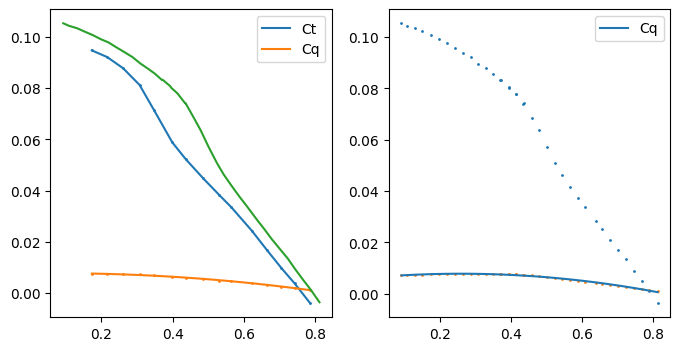

In [5]:
p3000ct = np.polyfit(D3000[:, 0], D3000[:, 1], 2)
p3000cq = np.polyfit(D3000[:, 0], D3000[:, 2]/(2*np.pi), 2)
p6000ct = np.polyfit(D6000[:, 0], D6000[:, 1], 2)
p6000cq = np.polyfit(D6000[:, 0], D6000[:, 2]/(2*np.pi), 2)

f3000ct = interp1d(D3000[:, 0], D3000[:, 1], 'cubic')
f6000ct = interp1d(D6000[:, 0], D6000[:, 1], 'cubic')

fig, ax = plt.subplots(1,2, figsize=(8,4))
ax.ravel()
ax[0].scatter(D3000[:, 0], D3000[:, 1], s=1)
ax[0].plot(D3000[:, 0], f3000ct(D3000[:, 0]), label='Ct')

ax[0].scatter(D3000[:, 0], D3000[:, 2]/(2*np.pi), s=1)
ax[0].plot(np.linspace(0.173, 0.786, 100), np.polyval(p3000cq, np.linspace(0.173, 0.786, 100)), label='Cq')
ax[0].legend()

ax[1].scatter(D6000[:, 0], D6000[:, 1], s=1)
ax[0].plot(D6000[:, 0], f6000ct(D6000[:, 0]), label='Ct')

ax[1].scatter(D6000[:, 0], D6000[:, 2]/(2*np.pi), s=1)
ax[1].plot(D6000[:, 0], np.polyval(p6000cq, D6000[:, 0]), label='Cq')
ax[1].legend()
f6000ct(0.5)

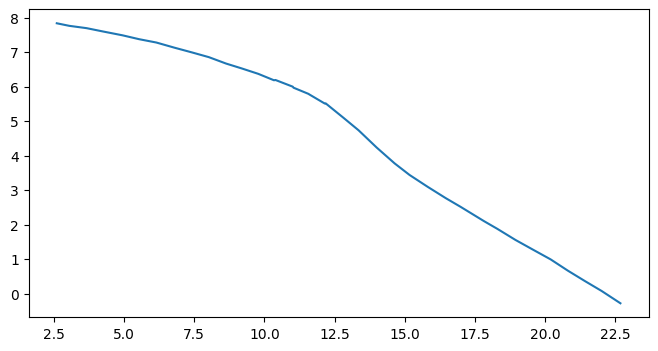

In [6]:
T = rho*D**4/(4*np.pi**2)*(omega6000**2)*f6000ct(D6000[:, 0])
fig1, ax1 = plt.subplots(1,1, figsize=(8,4))
ax1.plot(Va6000, T)